In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv(r"./RTA Dataset.csv")

In [3]:
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [4]:
df.describe(include='object').T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [5]:
df.shape

(12316, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


<AxesSubplot:>

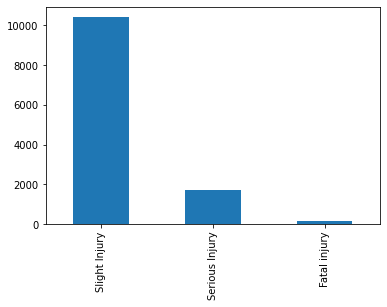

In [8]:
# target variable classes counts and bar plot
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

### Exploratory Data Analysis

<AxesSubplot:>

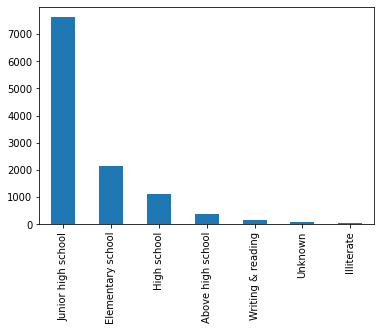

In [9]:
# Education levels of car drivers
df['Educational_level'].value_counts().plot(kind='bar')

Target looks like classification
Showing only top 10 of 31 categorical features


C:\Users\DHRUVI\myenv\lib\site-packages\dabl\plot\utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
C:\Users\DHRUVI\myenv\lib\site-packages\dabl\plot\utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
C:\Users\DHRUVI\myenv\lib\site-packages\dabl\plot\utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
C:\Users\DHRUVI\myenv\lib\site-packages\dabl\plot\utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
C:\Users\DHRUVI\myenv\lib\site-packages\dabl\plot\utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
C:\Users\DHRUVI\myenv\lib\site-packages\dabl\plot\utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
 

[[<Figure size 216x216 with 2 Axes>], None]

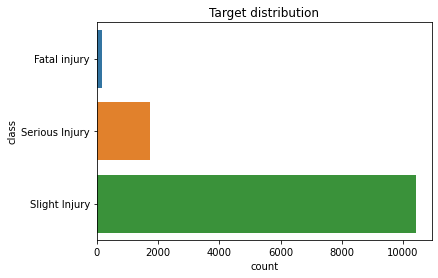

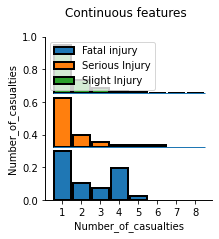

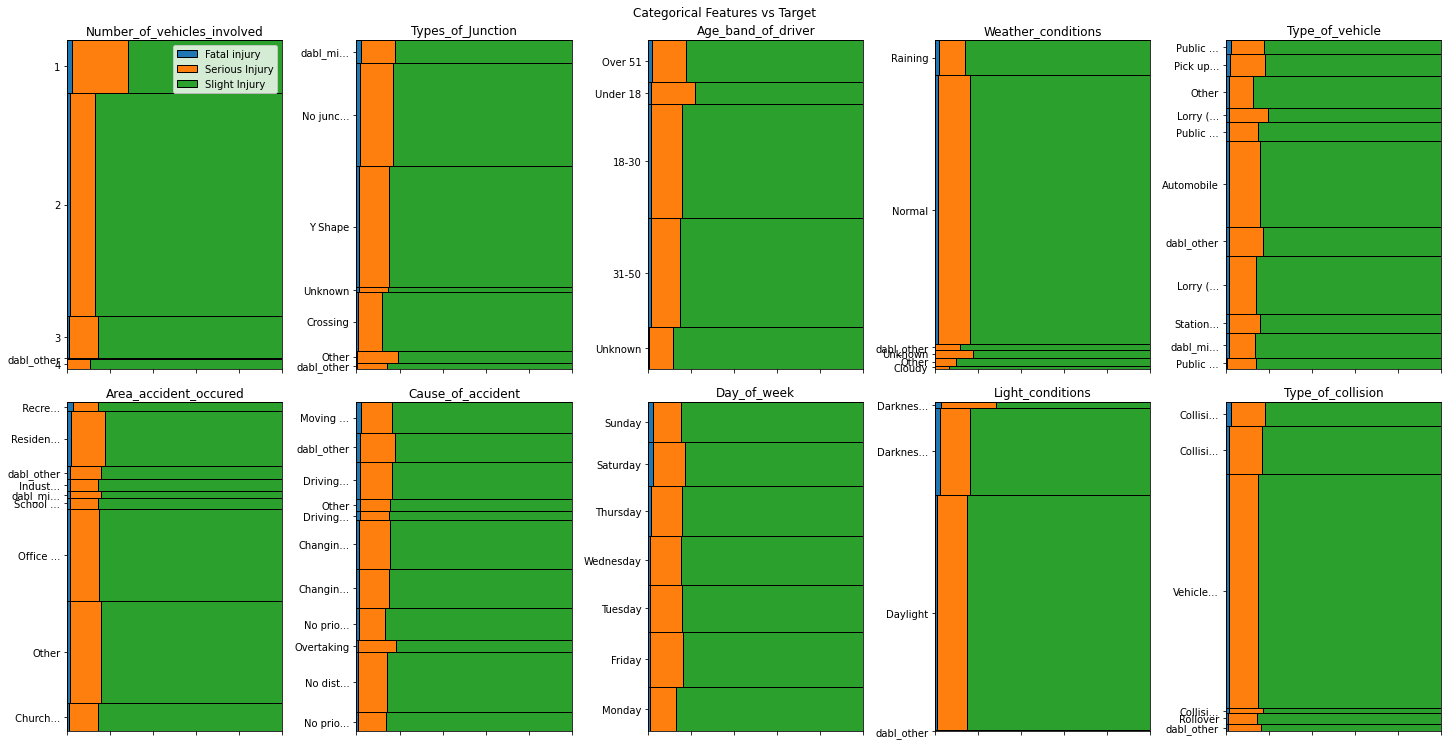

In [10]:
dabl.plot(df, target_col='Accident_severity')

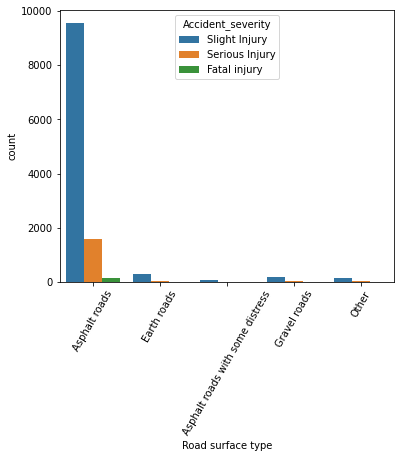

In [11]:
# plot the bar plot of road_surface_type and accident severity feature
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Road surface type')
plt.xticks(rotation=60)
plt.show()

### Data preparation

In [12]:
# convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

In [13]:
# Extracting 'Hour_of_Day' feature from the Time column
df["Time"].dt.hour

# extracting hour and minute from timestamp
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df.drop('Time', axis=1, inplace=True)

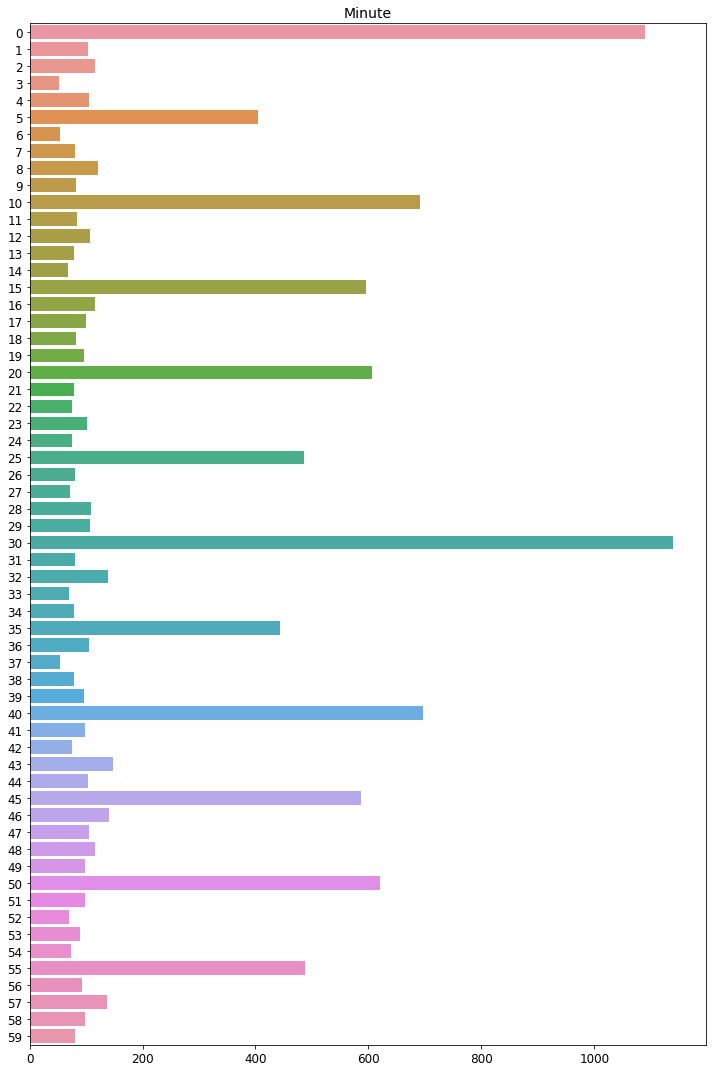

In [14]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='Minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Most of the accidents have taken place between 3pm to 6pm with maximum numbers at 5 pm
* Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.

In [15]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [16]:
df['Minute'] = df['Minute'].apply(lambda x: convert_minutes(x))

### Data Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [18]:
df.isnull().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [19]:
# drop columns that cause imbalance during imputation
df.drop(columns = ['Defect_of_vehicle', 'Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality'], inplace=True)

In [20]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [21]:
df.isna().sum() 

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
Hour                           0
Minute                         0
dtype: int64

### Encoding

In [22]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['Accident_severity'], axis=1).columns)
df.shape

(12316, 29)

<AxesSubplot:>

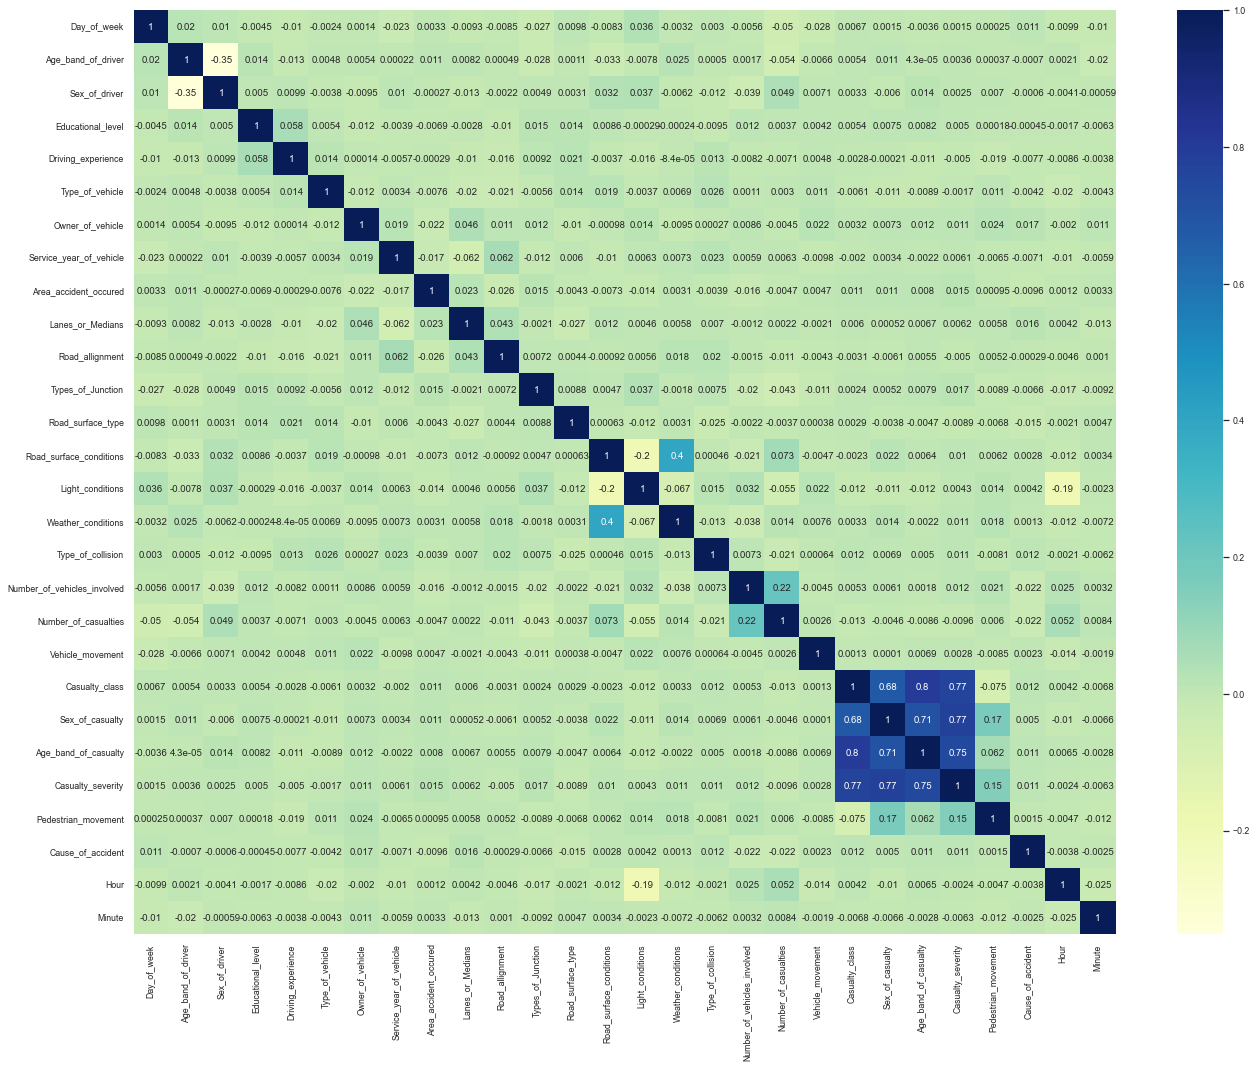

In [23]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [24]:
X = df.drop('Accident_severity',axis=1)
y=df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [25]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [26]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [27]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [28]:
y_train.shape

(21972,)

### Modelling

In [29]:
rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [30]:
# predicting on test data
predics = rf.predict(X_test)

In [31]:
# train score 
rf.score(X_train, y_train)

0.9997269251774986

In [32]:
# classification report on test dataset
classif_re = classification_report(y_test,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.33      0.06      0.10        52
           1       0.27      0.18      0.22       552
           2       0.85      0.91      0.88      3091

    accuracy                           0.79      3695
   macro avg       0.49      0.39      0.40      3695
weighted avg       0.76      0.79      0.77      3695



In [33]:
# f1_score of the model
f1score = f1_score(y_test,predics, average='weighted')
print(f1score)

0.7719092254195009


In [34]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[10:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DHRUVI\myenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [35]:
predict = xgb.predict(X_test)

In [36]:
xgb.score(X_train, y_train)

0.9784270890223922

In [37]:
# f1_score of the model
f1score = f1_score(y_test,predict, average='weighted')
print(f1score)

0.7677120145645293


### Hyperparameter tuning

In [38]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 400},
 0.8616026803462614)

In [39]:
import joblib

In [40]:
joblib.dump(rf, 'random_forest_final.joblib')

['random_forest_final.joblib']

In [41]:
X_train.to_csv('./selected_features.csv',index=False)

### Explainable AI

In [42]:
import shap

In [43]:
model = joblib.load("./random_forest_final.joblib")

In [44]:
df_new = pd.read_csv("./selected_features.csv")
df_new

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Hour,Minute
0,6,1,1,2,0,0,3,5,7,4,...,0,1,2,0,1,2,5,0,7,4
1,6,1,1,1,4,14,3,3,7,2,...,0,2,0,1,0,2,5,16,6,2
2,3,4,0,4,0,7,3,5,7,2,...,0,2,0,1,0,2,5,3,6,0
3,2,1,1,4,2,9,3,3,7,4,...,0,2,0,1,0,2,5,1,4,6
4,5,3,1,2,1,0,1,2,2,2,...,5,2,0,1,1,2,5,12,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21967,5,0,1,4,4,5,3,5,4,2,...,0,1,0,0,3,2,4,9,14,6
21968,3,0,1,4,2,9,1,3,12,2,...,0,2,1,1,3,2,5,1,12,10
21969,5,1,1,1,2,5,3,2,6,0,...,0,2,3,2,5,3,5,10,20,2
21970,3,0,1,0,2,14,1,2,3,2,...,0,1,0,1,0,2,5,3,14,2


In [45]:
# Sample your data 
data_sample = df_new[:1000]

In [46]:
shap.initjs()

In [47]:
explainer = shap.TreeExplainer(model)

In [48]:
shap_value = explainer.shap_values(data_sample, approximate=True)

### Summary plot

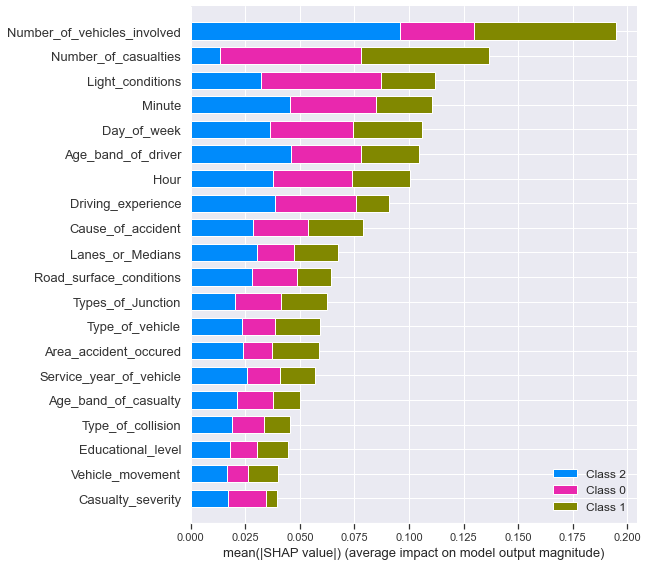

In [49]:
shap.summary_plot(shap_value, data_sample, plot_type="bar")

### Force plot 

In [50]:
# Force Plot for a single observation for a single class 0
shap.force_plot(explainer.expected_value[0],
shap_value[0][0,:], data_sample.iloc[0])

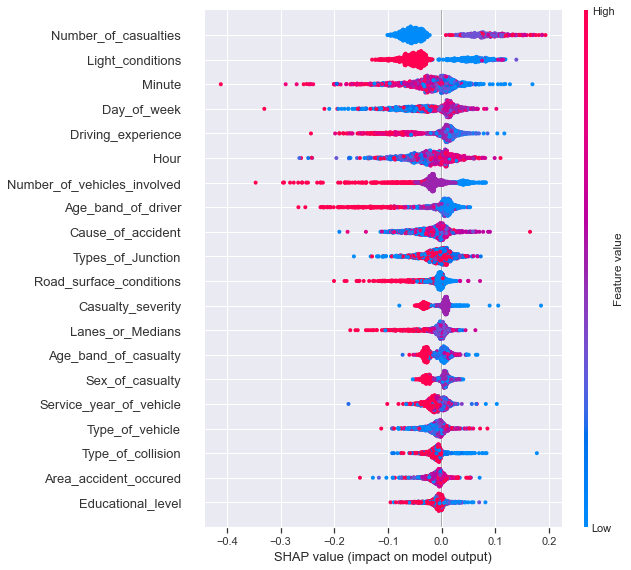

In [51]:
#summary plot for single class
shap.summary_plot(shap_value[0], data_sample)

### Waterfall model

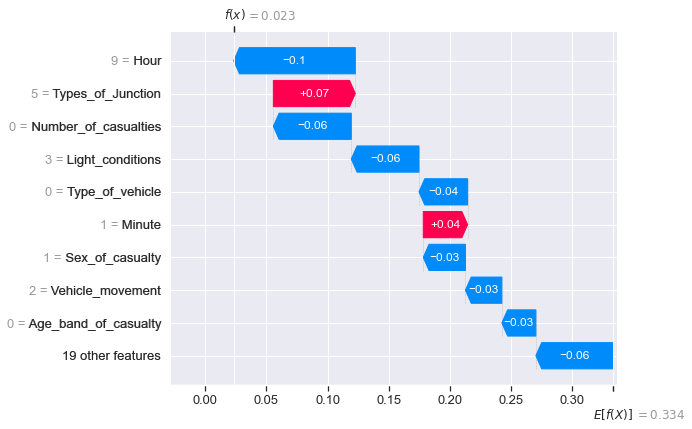

In [52]:
# Waterfall model
row=30
shap.waterfall_plot(shap.Explanation(values=shap_value[0][row], 
                                              base_values=explainer.expected_value[0], data=data_sample.iloc[row],  
                                         feature_names=data_sample.columns.tolist()))

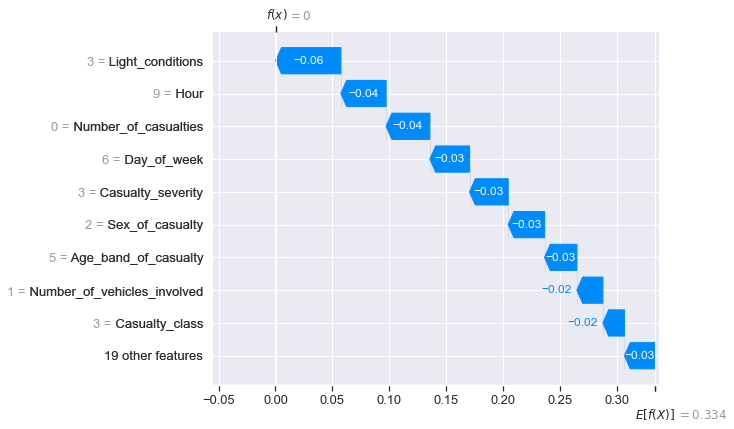

In [53]:
row=90
shap.waterfall_plot(shap.Explanation(values=shap_value[0][row], 
                                              base_values=explainer.expected_value[0], data=data_sample.iloc[row],  
                                         feature_names=data_sample.columns.tolist()))